In [ ]:
#Pregunta 1: ¿Cuál es el tipo de desarrollo más popular entre los individuos?

In [3]:
#cargar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline


In [4]:
df = pd.read_csv('./survey-results-public.csv')
schema = pd.read_csv('./survey-results-schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Question 1
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - el marco de datos de pandas que desea buscar
    col1 - el nombre de la columna que desea examinar
    col2 - la columna de la que desea contar los valores
    look_for - una lista de cadenas que desea buscar en cada fila de df[col]

    OUTPUT:
    new_df - un marco de datos de cada look_for con el recuento de la frecuencia con la que aparece
    '''
    new_df = defaultdict(int)
    #bucle a través de la lista de tipos de ed
    for val in look_for:
        #bucle a través de filas
        for idx in range(df.shape[0]):
            #si el tipo de ed está en la fila, agregue 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

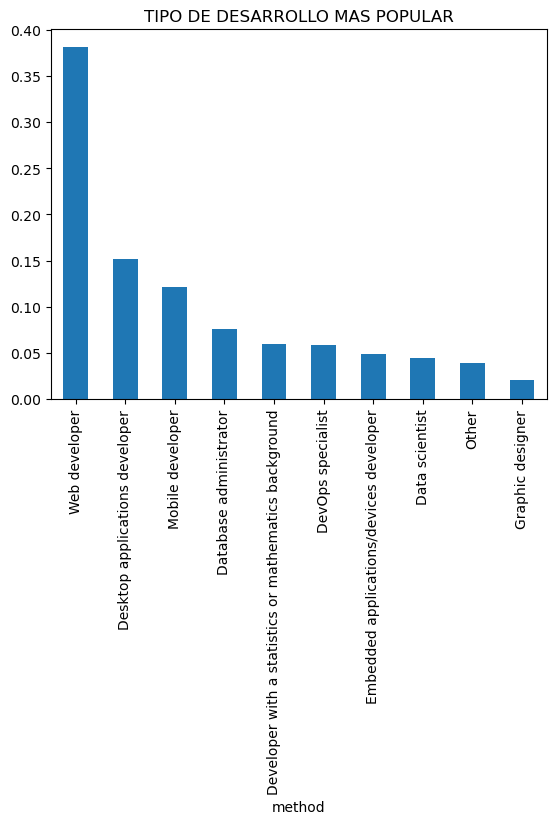

In [6]:
possible_vals = ["Data scientist", "Database administrator", "Desktop applications developer",
                 "Developer with a statistics or mathematics background", "DevOps specialist",
                 "Embedded applications/devices developer", "Graphic designer", "Graphics programming"
                 "Machine learning specialist", "Mobile developer", "NA", "Other", "Quality assurance engineer"
                 "Systems administrator", "Web developer"]

def clean_and_plot(df, title='TIPO DE DESARROLLO MAS POPULAR', plot=True):
    '''
    INPUT 
        df - un marco de datos que contiene la columna DeveloperType
        title - cadena el título de su trama
        axis - axis object
        plot - bool proporcionar si desea o no una trama de vuelta
        
    OUTPUT
        study_df - un marco de datos con el conteo de cuántas personas
        Muestra un gráfico de cosas bonitas relacionadas con la columna DeveloperType.
    '''
    study = df['DeveloperType'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'DeveloperType': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)


In [ ]:
#Pregunta 2: ¿Cuál es el genero que tiene una mayor participación en el mercado de la programación?

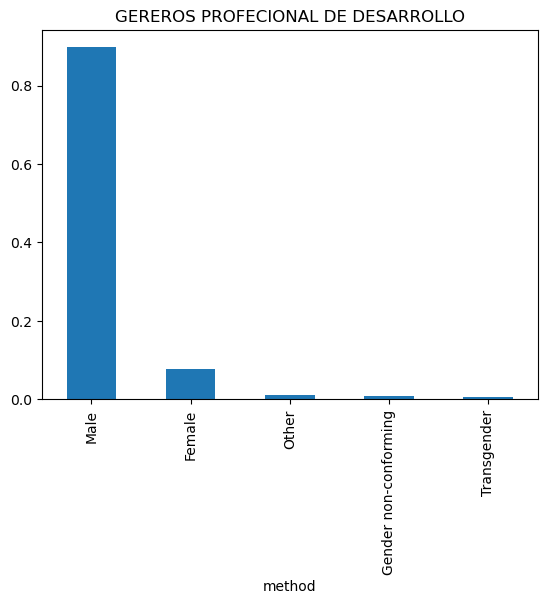

In [7]:
possible_vals = ["Female", "Gender non-conforming", "Male", "NA", "Other", "Transgender"]

def clean_and_plot(df, title='GEREROS PROFECIONAL DE DESARROLLO', plot=True):
    '''
    INPUT 
        df - un marco de datos que contiene la columna Gender
        title - cadena el título de su trama
        axis - axis object
        plot - bool proporcionar si desea o no una trama de vuelta
        
    OUTPUT
        study_df - un marco de datos con el conteo de cuántas personas
        Muestra un gráfico de cosas bonitas relacionadas con la columna Gender.
    '''
    study = df['Gender'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'Gender': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)


In [8]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X: una matriz que contiene todas las variables que desea considerar al predecir la respuesta
    y - el vector de respuesta correspondiente
    
    Esta función limpia df usando los siguientes pasos para producir X e y:
     1. Eliminar todas las filas sin salarios
     2. Cree X como todas las columnas que no son la columna Salario
     3. Cree y como la columna Salario
     4. Elimine las columnas Salario, Respondiente y Salario esperado de X
     5. Para cada variable numérica en X, complete la columna con el valor medio de la columna.
     6. Cree columnas ficticias para todas las variables categóricas en X, suelte las columnas originales
     '''
    # Elimina filas con valores de ExpectedSalary faltantes
    df = df.dropna(subset=['ExpectedSalary'], axis=0)
    y = df['ExpectedSalary']
    
    #Eliminar columnas de encuestado y salario
    df = df.drop(['Respondent','ExpectedSalary'], axis=1)
    
    # Rellenar columnas numéricas con la media
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy las variables categóricas
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # para cada cat agregue var ficticia, elimina la columna original
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    


In [9]:
#Usar la función para crear X e y
X, y = clean_data(df) 

In [10]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, variable a predecir
    cutoffs - lista de enteros, límite para el número de valores distintos de cero en variables categóricas ficticias
    test_size - float between 0 and 1, default 0.3, determina la proporción de datos como datos de prueba
    random_state - int, default 42, controla el estado aleatorio de train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - lista de valores flotantes de r2 en los datos de prueba
    r2_scores_train - lista de floats de score r2 en tabla de entrenamiento
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #divide los datos en entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #ajuste el modelo y obtenga la respuesta pred
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #agregar el valor r2 del conjunto de prueba
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('NUMERO DE CARACTERISTICAS')
        plt.ylabel('R-CUADRADO')
        plt.title('R-CUADRADO POR NUMERO DE CARACTERISTICAS')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #divide los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    # adaptar el modelo
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

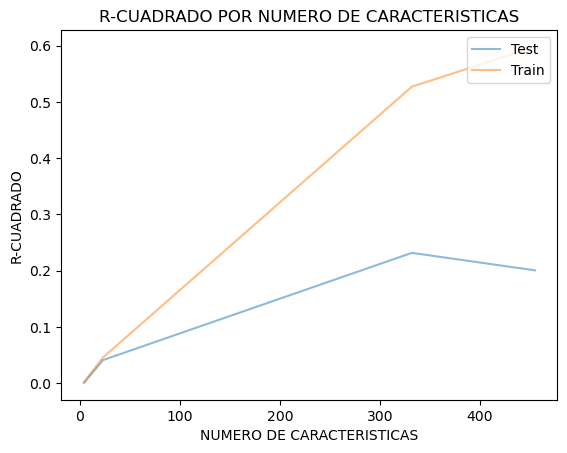

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [11]:
#cutoffs aquí se refiere a la cantidad de valores faltantes permitidos en las columnas utilizadas.
#Por lo tanto, los valores más bajos para el límite proporcionan más predictores en el modelo.
cutoffs = [5000, 3500, 2500, 1000, 100, 50]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [12]:
print(X_train.shape[1]) #Número de columnas
print(r2_scores_test[np.argmax(r2_scores_test)]) # El modelo que debemos implementar test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # El modelo que debemos implementar train_r2


332
0.23148679895476187
0.5270275299287209


In [13]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coeficientes - los coeficientes del modelo lineal
    X_train: los datos de entrenamiento, por lo que se pueden usar los nombres de las columnas
    OUTPUT:
    coefs_df: un marco de datos que contiene el coeficiente, la estimación y abs (estimación)
    
    Proporciona un marco de datos que se puede utilizar para comprender los coeficientes más influyentes.
     en un modelo lineal proporcionando las estimaciones del coeficiente junto con el nombre del
     variable adjunta al coeficiente.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [14]:
#usar la funcion
coef_df = coef_weights(lm_model.coef_, X_train)

#Un vistazo rápido a los mejores resultados primeras 20 filas
coef_df.head(20)

,est_int,coefs,abs_coefs
1,JobSatisfaction,4.353797e+18,4.353797e+18
11,Country_United States,3.096285e+04,3.096285e+04
6,Country_Canada,3.036607e+04,3.036607e+04
176,Currency_Indian rupees (?),-1.850941e+04,1.850941e+04
9,Country_India,1.641203e+04,1.641203e+04
8,Country_Germany,1.485375e+04,1.485375e+04
177,Currency_U.S. dollars ($),1.445840e+04,1.445840e+04
173,Currency_British pounds sterling (£),9.610308e+03,9.610308e+03
247,InfluenceInternet_Somewhat satisfied,-9.391242e+03,9.391242e+03
7,Country_France,9.261703e+03,9.261703e+03
